# ENGR 28: Homework 2

## Problem 1. Bonus Question

Please enter V_r: 3.14
Please enter V_l: 6.28
Please enter the distance from the wall: 10


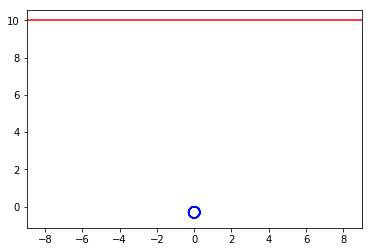

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# start the robot out at 0,0,0
(x, y, theta) = (0, 0, 0)

# simulate for this amount of time (say, 100 seconds)
t_final = 100.0 

# set a reasonable delta t
delta_t = 0.125 

# start at t = 0
t = 0.0 

# robot parameters
r = 0.02 # wheels have 2cm radius
d = 0.10 # wheels 10cm apart

# start a list of x/y pairs to plot
all_points = [ (x, y) ]

# ask for input
vr = float(input("Please enter V_r: "))
vl = float(input("Please enter V_l: "))

# simulate the desired amount of time
while t < t_final:

    # diff drive kinematics update
    linear_vel = (vl + vr)*r/2.0
    angular_vel = (vr - vl)*r/(2.0*d)

    # Euler's method update
    x += delta_t * linear_vel * np.cos(theta)
    y += delta_t * linear_vel * np.sin(theta)
    theta += delta_t * angular_vel
    
    # time update
    t += delta_t
    
    # account for the special case where vl = vr
    if vl == vr:
        all_points.append( (0, -x) )
    
    # add x, y point
    else:
        all_points.append( (x, y) )

# convert points to numpy array so we can do 2D indexing like below
all_points = np.array(all_points)
        
# plot using blue lines with -'s
plt.plot(all_points[:,0], all_points[:,1], 'b--')

# ask for input for wall distance
wall = float(input("Please enter the distance from the wall: "))

# plot the wall
plt.axhline(y=wall, color='r', linestyle='-')

# make sure circles look like circles
plt.axis('equal')

# show the plot
plt.show()

# Problem 2. Part D

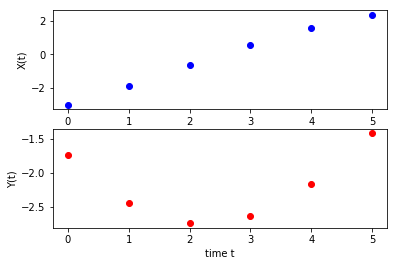

In [37]:
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy.linalg import inv

# define pi
pi = 3.1415926535

for t in range(0,6):
    # transformation matrices
    TWA = np.matrix([[math.cos(-pi*t/10.0), math.sin(pi*t/10.0), 0.5+2*math.sin(pi*t/10.0)], [math.sin(-pi*t/10.0), math.cos(-pi*t/10.0), 2*math.cos(pi*t/10.0)], [0, 0, 1]])
    TWB = np.matrix([[math.cos(7*pi/6), math.sin(7*pi/6), 3.5+0.2*math.cos(7*pi/6)*t], [math.sin(7*pi/6), math.cos(7*pi/6), 2.0+0.25*math.sin(7*pi/6)*t], [0, 0, 1]])
    TLA = np.matrix([[1, 0, -0.25], [0, 1, 1], [0, 0, 1]])
    TCB = np.matrix([[1, 0, -0.25], [0, 1, 1], [0, 0, 1]])

    # position of the light L in the coordinate frame of the camera C
    TLC = TLA*inv(TWA)*TWB*inv(TCB)

    # obtain the functions for x(t) and y(t)
    x = TLC.item(2)
    y = TLC.item(5)

    # plot x and y using blue and red dots, respectively
    plt.subplot(211)
    plt.plot(t, -x, 'bo')
    plt.xlabel('time t')
    plt.ylabel('X(t)')
    
    plt.subplot(212)
    plt.plot(t, -y, 'ro')
    plt.xlabel('time t')
    plt.ylabel('Y(t)')

# show the plot
plt.show()
